# Projeto de Análise de Dados


Os dados são extraidos do site https://www.kaggle.com/datasets

Os dados que serão utilizado para essa analise será:

Emergency - 911 Calls (https://www.kaggle.com/mchirico/montcoalert) 
O aquivo está como 911.csv

### Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importando as bibliotecas 

In [2]:
df = pd.read_csv('911.csv')

### Verificando as informações lidas 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Os 5 CEPs mais chamados

In [5]:
df['zip'].value_counts().head(5) 

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

5 Municípios principais

In [6]:
df['twp'].value_counts().head(5) 

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Verificando as razões das ligações: EMS, Fire, Traffic;

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Extrair do title essa informação

In [8]:
df['Razao'] = df['title'].apply(lambda x: x.split(':')[0])

Verificando essa coluna criada

In [9]:
df['Razao'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Razao, dtype: int64

Importando a biblioteca Seaborn;

In [10]:
import seaborn as sns

Criando um histograma com o Seaborn para a essa razão.

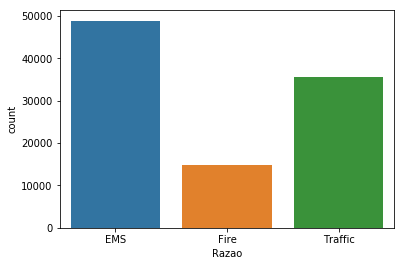

In [12]:
sns.countplot(x='Razao',data=df)

### Trabalhando com a informações de tempo (timeStamp).

In [14]:
type(df['timeStamp'].iloc[0])

str

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
df['Hora'] = df['timeStamp'].apply(lambda time: time.hour)
df['Mes'] = df['timeStamp'].apply(lambda time: time.month)
df['Dias'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Conferindo as informações

In [30]:
df['Dias'].value_counts() 

Ter    15150
Qua    14879
Sex    14833
Seg    14680
Qui    14478
Sab    13336
Dom    12136
Name: Dias, dtype: int64

In [31]:
df['Mes'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: Mes, dtype: int64

In [36]:
df['Hora'].value_counts().head(5) 

17    6517
16    6490
15    6154
12    6029
14    5997
Name: Hora, dtype: int64

Mapeando os dias da semana em numeros inteiros

In [21]:
dmap = {0:'Seg',1:'Ter',2:'Qua',3:'Qui',4:'Sex',5:'Sab',6:'Dom'}

In [37]:
df['Dias'] = df['Dias'].map(dmap)

** Criando Histogramas **

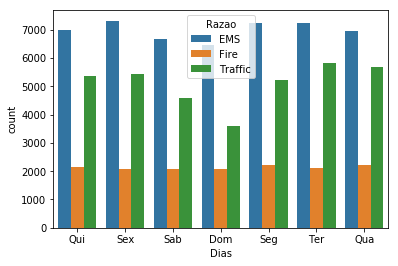

In [34]:
sns.countplot(x='Dias',data=df,hue='Razao')

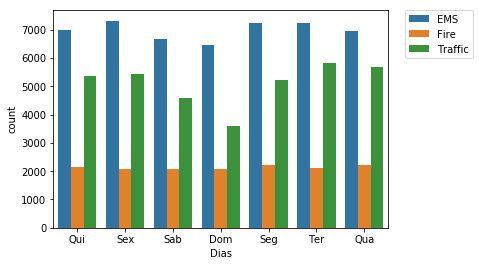

In [38]:
sns.countplot(x='Dias',data=df,hue='Razao')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

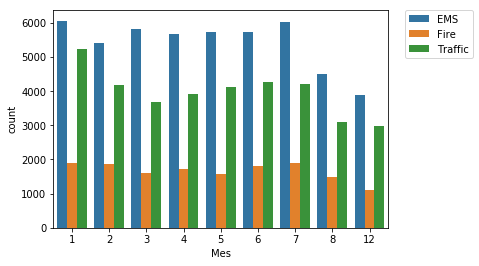

In [39]:
sns.countplot(x='Mes',data=df,hue='Razao')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)